<a href="https://colab.research.google.com/github/Shameem4142/stock-prediction/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEP 1 - DATA PREPROCESSING

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
df=pd.read_csv("/content/TATAMOTORS_24.csv")
ts=df.iloc[: ,1:2].values

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02 00:00:00+05:30,179.029724,183.086212,176.902542,181.997894,176.739136,10175802
1,2012-01-03 00:00:00+05:30,184.273483,192.732742,184.224014,191.891769,186.347137,15868503
2,2012-01-04 00:00:00+05:30,191.792831,200.351028,190.951843,199.064835,193.312943,22752471
3,2012-01-05 00:00:00+05:30,198.817490,203.566544,198.075439,199.955276,194.177658,21640778
4,2012-01-06 00:00:00+05:30,197.877563,202.824509,196.393478,201.439362,195.618866,13553191
...,...,...,...,...,...,...,...
2725,2023-01-18 00:00:00+05:30,415.899994,415.950012,407.450012,408.399994,408.399994,13310316
2726,2023-01-19 00:00:00+05:30,406.500000,407.799988,400.100006,400.750000,400.750000,13126520
2727,2023-01-20 00:00:00+05:30,404.000000,412.500000,401.200012,403.149994,403.149994,23906114
2728,2023-01-23 00:00:00+05:30,407.000000,410.950012,405.000000,408.399994,408.399994,13113183


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02 00:00:00+05:30,179.029724,183.086212,176.902542,181.997894,176.739136,10175802
1,2012-01-03 00:00:00+05:30,184.273483,192.732742,184.224014,191.891769,186.347137,15868503
2,2012-01-04 00:00:00+05:30,191.792831,200.351028,190.951843,199.064835,193.312943,22752471
3,2012-01-05 00:00:00+05:30,198.817490,203.566544,198.075439,199.955276,194.177658,21640778
4,2012-01-06 00:00:00+05:30,197.877563,202.824509,196.393478,201.439362,195.618866,13553191


FEATURE SCALING

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
ts_scaled=sc.fit_transform(ts)

In [ ]:
X_train=[]
Y_train=[]
for i in range(60,2730):
  X_train.append(ts_scaled[i-60:i,0])
  Y_train.append(ts_scaled[i,0])
X_train,Y_train=np.array(X_train),np.array(Y_train)

In [ ]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

STEP 2 - BUILDING THE RNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor=Sequential()
regressor.add(LSTM(units=50,return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(Dense(units=1))
regressor.compile(optimizer="adam",loss="mean_squared_error")
regressor.fit(X_train,Y_train,epochs=100,batch_size=32)

Epoch 1/100
84/84 [==============================] - 20s 137ms/step - loss: 0.0185
Epoch 2/100
84/84 [==============================] - 12s 147ms/step - loss: 0.0056
Epoch 3/100
84/84 [==============================] - 9s 109ms/step - loss: 0.0051
Epoch 4/100
84/84 [==============================] - 9s 102ms/step - loss: 0.0049
Epoch 5/100
84/84 [==============================] - 9s 113ms/step - loss: 0.0049
Epoch 6/100
84/84 [==============================] - 10s 113ms/step - loss: 0.0040
Epoch 7/100
84/84 [==============================] - 8s 100ms/step - loss: 0.0038
Epoch 8/100
84/84 [==============================] - 9s 113ms/step - loss: 0.0036
Epoch 9/100
84/84 [==============================] - 10s 114ms/step - loss: 0.0035
Epoch 10/100
84/84 [==============================] - 9s 113ms/step - loss: 0.0035
Epoch 11/100
84/84 [==============================] - 9s 109ms/step - loss: 0.0031
Epoch 12/100
84/84 [==============================] - 10s 113ms/step - loss: 0.0031
Epoch 13

STEP 3 - MAKING THE PREDICTIONS AND VISUALIZING THE RESULTS

In [ ]:
df1=pd.read_csv("/content/TATAMOTORS_24.csv")
real_sp=df1.iloc[:, 1:2].values

In [ ]:
df_total=pd.concat((df['Open'],df1['Open']),axis=0)

inputs=df_total[len(df_total)- len(df1)- 60:].values
inputs=inputs.reshape(-1,1)
inputes=sc.transform(inputs)
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_sp=regressor.predict(X_test)
predicted_sp=sc.inverse_transform(predicted_sp)

1/1 [==============================] - 2s 2s/step


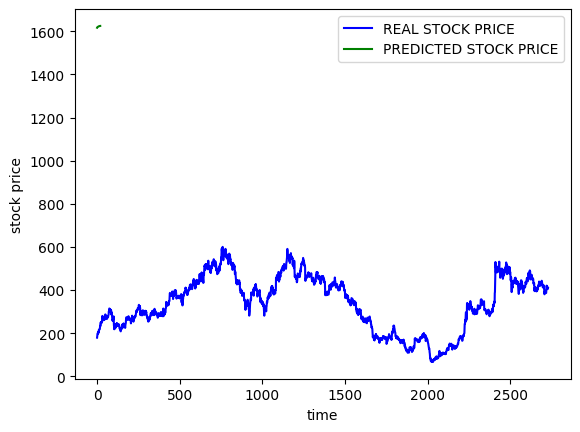

In [ ]:
plt.plot(real_sp,color="blue",label="REAL STOCK PRICE")
plt.plot(predicted_sp,color="green",label="PREDICTED STOCK PRICE")
plt.xlabel("time")
plt.ylabel("stock price")
plt.legend()
plt.show()

THE END